# Programming Assignment: 
## Готовим LDA по рецептам

Как вы уже знаете, в тематическом моделировании делается предположение о том, что для определения тематики порядок слов в документе не важен; об этом гласит гипотеза «мешка слов». Сегодня мы будем работать с несколько нестандартной для тематического моделирования коллекцией, которую можно назвать «мешком ингредиентов», потому что на состоит из рецептов блюд разных кухонь. Тематические модели ищут слова, которые часто вместе встречаются в документах, и составляют из них темы. Мы попробуем применить эту идею к рецептам и найти кулинарные «темы». Эта коллекция хороша тем, что не требует предобработки. Кроме того, эта задача достаточно наглядно иллюстрирует принцип работы тематических моделей.

Для выполнения заданий, помимо часто используемых в курсе библиотек, потребуются модули *json* и *gensim*. Первый входит в дистрибутив Anaconda, второй можно поставить командой 

*pip install gensim*

Построение модели занимает некоторое время. На ноутбуке с процессором Intel Core i7 и тактовой частотой 2400 МГц на построение одной модели уходит менее 10 минут.

### Загрузка данных

Коллекция дана в json-формате: для каждого рецепта известны его id, кухня (cuisine) и список ингредиентов, в него входящих. Загрузить данные можно с помощью модуля json (он входит в дистрибутив Anaconda):

In [4]:
import json
!pip install gensim


DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


In [5]:
with open("recipes.json") as f:
    recipes = json.load(f)

In [77]:
print (recipes[0])

{u'cuisine': u'greek', u'id': 10259, u'ingredients': [u'romaine lettuce', u'black olives', u'grape tomatoes', u'garlic', u'pepper', u'purple onion', u'seasoning', u'garbanzo beans', u'feta cheese crumbles']}


### Составление корпуса

In [7]:
from gensim import corpora, models
import numpy as np

Наша коллекция небольшая, и целиком помещается в оперативную память. Gensim может работать с такими данными и не требует их сохранения на диск в специальном формате. Для этого коллекция должна быть представлена в виде списка списков, каждый внутренний список соответствует отдельному документу и состоит из его слов. Пример коллекции из двух документов: 

[["hello", "world"], ["programming", "in", "python"]]

Преобразуем наши данные в такой формат, а затем создадим объекты corpus и dictionary, с которыми будет работать модель.

In [8]:
texts = [recipe["ingredients"] for recipe in recipes]

dictionary = corpora.Dictionary(texts)   # составляем словарь
corpus = [dictionary.doc2bow(text) for text in texts]  # составляем корпус документов

In [79]:
print texts[1]
print corpus[1]
recipes[0]

[u'plain flour', u'ground pepper', u'salt', u'tomatoes', u'ground black pepper', u'thyme', u'eggs', u'green tomatoes', u'yellow corn meal', u'milk', u'vegetable oil']
[(9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]


{u'cuisine': u'greek',
 u'id': 10259,
 u'ingredients': [u'romaine lettuce',
  u'black olives',
  u'grape tomatoes',
  u'garlic',
  u'pepper',
  u'purple onion',
  u'seasoning',
  u'garbanzo beans',
  u'feta cheese crumbles']}

У объекта dictionary есть полезная переменная dictionary.token2id, позволяющая находить соответствие между ингредиентами и их индексами.

### Обучение модели
Вам может понадобиться [документация](https://radimrehurek.com/gensim/models/ldamodel.html) LDA в gensim.

__Задание 1.__ Обучите модель LDA с 40 темами, установив количество проходов по коллекции 5 и оставив остальные параметры по умолчанию. 


Затем вызовите метод модели *show_topics*, указав количество тем 40 и количество токенов 10, и сохраните результат (топы ингредиентов в темах) в отдельную переменную. Если при вызове метода *show_topics* указать параметр *formatted=True*, то топы ингредиентов будет удобно выводить на печать, если *formatted=False*, будет удобно работать со списком программно. Выведите топы на печать, рассмотрите темы, а затем ответьте на вопрос:

Сколько раз ингредиенты "salt", "sugar", "water", "mushrooms", "chicken", "eggs" встретились среди топов-10 всех 40 тем? При ответе __не нужно__ учитывать составные ингредиенты, например, "hot water".

Передайте 6 чисел в функцию save_answers1 и загрузите сгенерированный файл в форму.

У gensim нет возможности фиксировать случайное приближение через параметры метода, но библиотека использует numpy для инициализации матриц. Поэтому, по утверждению автора библиотеки, фиксировать случайное приближение нужно командой, которая написана в следующей ячейке. __Перед строкой кода с построением модели обязательно вставляйте указанную строку фиксации random.seed.__

In [23]:
np.random.seed(76543)
# здесь код для построения модели:

%time ldamodel = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=40, passes=5)

Wall time: 3min 21s


In [68]:
topics = ldamodel.show_topics(num_topics = 40, num_words=10, formatted=True)
top_10 = topics[:10]
ingr = ['salt', 'sugar', 'water', 'mushrooms', 'chicken', 'eggs']
dict = {}
for i in range(len(ingr)):
    dict[ingr[i]] = 0

for topic in top_10:
    for i,let in enumerate(topic):
        if type(let) != int:
            for j, l in enumerate(let):
                record = ''
                if l.isalpha() == True and let[j+1].isalpha() == True:
                    record += l
                    k = j + 1
                    while let[k].isalpha() == True:
                        record += let[k]
                        k += 1
                    for ing in ingr:
                        if ing == record:
                            dict[ing] += 1
dict
                    
                    
                    
                

    

{'chicken': 3, 'eggs': 1, 'mushrooms': 2, 'salt': 8, 'sugar': 3, 'water': 1}

In [71]:
c_salt = dict['salt']
c_sugar = dict['sugar']
c_water = dict['water']
c_mushrooms = dict['mushrooms']
c_chicken = dict['chicken']
c_eggs = dict['eggs']
ans_arr = [dict['salt'],  dict['sugar'], dict['water'], dict['mushrooms'], dict['chicken'], dict['eggs']]
for i in ans_arr:
    print i

8
3
1
2
3
1


In [72]:
def save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs):
    with open("cooking_LDA_pa_task1.txt", "w") as fout:
        fout.write([str(el) for el in ans_arr])

### Фильтрация словаря
В топах тем гораздо чаще встречаются первые три рассмотренных ингредиента, чем последние три. При этом наличие в рецепте курицы, яиц и грибов яснее дает понять, что мы будем готовить, чем наличие соли, сахара и воды. Таким образом, даже в рецептах есть слова, часто встречающиеся в текстах и не несущие смысловой нагрузки, и поэтому их не желательно видеть в темах. Наиболее простой прием борьбы с такими фоновыми элементами — фильтрация словаря по частоте. Обычно словарь фильтруют с двух сторон: убирают очень редкие слова (в целях экономии памяти) и очень частые слова (в целях повышения интерпретируемости тем). Мы уберем только частые слова.

In [90]:
import copy
dictionary2 = copy.deepcopy(dictionary)
len(dictionary2.dfs)

6714

__Задание 2.__ У объекта dictionary2 есть переменная *dfs* — это словарь, ключами которого являются id токена, а элементами — число раз, сколько слово встретилось во всей коллекции. Сохраните в отдельный список ингредиенты, которые встретились в коллекции больше 4000 раз. Вызовите метод словаря *filter_tokens*, подав в качестве первого аргумента полученный список популярных ингредиентов. Вычислите две величины: dict_size_before и dict_size_after — размер словаря до и после фильтрации.

Затем, используя новый словарь, создайте новый корпус документов, corpus2, по аналогии с тем, как это сделано в начале ноутбука. Вычислите две величины: corpus_size_before и corpus_size_after — суммарное количество ингредиентов в корпусе (для каждого документа вычислите число различных ингредиентов в нем и просуммируйте по всем документам) до и после фильтрации.

Передайте величины dict_size_before, dict_size_after, corpus_size_before, corpus_size_after в функцию save_answers2 и загрузите сгенерированный файл в форму.

In [97]:
ids = []
for key, value in dictionary2.dfs.items():
    if value > 4000:
        ids.append(key)

dictionary2.filter_tokens(ids)
dict_size_before = len(dictionary)
dict_size_after = len(dictionary2)

corpus_size_before = []
for t in corpus:
    for pair in t:
        if pair[0] not in corpus_size_before:
            corpus_size_before.append(pair[0])
len(corpus_size_before)

6714

In [98]:
corpus2 = [dictionary2.doc2bow(text) for text in texts]
corpus_size_after = []
for t in corpus2:
    for pair in t:
        if pair[0] not in corpus_size_after:
            corpus_size_after.append(pair[0])
len(corpus_size_after)

6702

In [99]:
def save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after):
    with open("cooking_LDA_pa_task2.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [dict_size_before, dict_size_after, corpus_size_before, corpus_size_after]]))

### Сравнение когерентностей
__Задание 3.__ Постройте еще одну модель по корпусу corpus2 и словарю dictionary2, остальные параметры оставьте такими же, как при первом построении модели. Сохраните новую модель в другую переменную (не перезаписывайте предыдущую модель). Не забудьте про фиксирование seed!

Затем воспользуйтесь методом *top_topics* модели, чтобы вычислить ее когерентность. Передайте в качестве аргумента соответствующий модели корпус. Метод вернет список кортежей (топ токенов, когерентность), отсортированных по убыванию последней. Вычислите среднюю по всем темам когерентность для каждой из двух моделей и передайте в функцию save_answers3. 

In [100]:
np.random.seed(76543)
# здесь код для построения модели:

%time ldamodel2 = models.ldamodel.LdaModel(corpus2, id2word=dictionary2, num_topics=40, passes=5)

Wall time: 2min 2s


In [164]:
coherence2 = ldamodel2.top_topics(corpus2)
coherence = ldamodel.top_topics(corpus)



In [158]:
s = 0
n = 40
for i in coherence:
    for j in i:
        if type(j) != list:
            s += j
summ = s/n
print(summ,s,n)

s1=0
n1=40
for i in coherence2:
    for j in i:
        if type(j)!=list:
            s1=s1+j
summ_2=s1/n1
print(summ_2, s1, n1)

(-6.316812924678653, -252.67251698714614, 40)
(-8.656146900568638, -346.2458760227455, 40)


In [ ]:
def save_answers3(coherence, coherence2):
    with open("cooking_LDA_pa_task3.txt", "w") as fout:
        fout.write(" ".join(["%3f"%el for el in [coherence, coherence2]]))

Считается, что когерентность хорошо соотносится с человеческими оценками интерпретируемости тем. Поэтому на больших текстовых коллекциях когерентность обычно повышается, если убрать фоновую лексику. Однако в нашем случае этого не произошло. 

### Изучение влияния гиперпараметра alpha

В этом разделе мы будем работать со второй моделью, то есть той, которая построена по сокращенному корпусу. 

Пока что мы посмотрели только на матрицу темы-слова, теперь давайте посмотрим на матрицу темы-документы. Выведите темы для нулевого (или любого другого) документа из корпуса, воспользовавшись методом *get_document_topics* второй модели:

In [163]:
ldamodel2.get_document_topics(corpus2[0])

[(25, 0.1281231), (31, 0.6172302), (33, 0.1390182)]

Также выведите содержимое переменной *.alpha* второй модели:

In [167]:
alpha = ldamodel2.alpha
alpha

array([0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025], dtype=float32)

У вас должно получиться, что документ характеризуется небольшим числом тем. Попробуем поменять гиперпараметр alpha, задающий априорное распределение Дирихле для распределений тем в документах.

__Задание 4.__ Обучите третью модель: используйте сокращенный корпус (corpus2 и dictionary2) и установите параметр __alpha=1__, passes=5. Не забудьте про фиксацию seed! Выведите темы новой модели для нулевого документа; должно получиться, что распределение над множеством тем практически равномерное. Чтобы убедиться в том, что во второй модели документы описываются гораздо более разреженными распределениями, чем в третьей, посчитайте суммарное количество элементов, __превосходящих 0.01__, в матрицах темы-документы обеих моделей. Другими словами, запросите темы  модели для каждого документа с параметром *minimum_probability=0.01* и просуммируйте число элементов в получаемых массивах. Передайте две суммы (сначала для модели с alpha по умолчанию, затем для модели в alpha=1) в функцию save_answers4.

In [168]:
np.random.seed(76543)
ldamodel3 = models.ldamodel.LdaModel(corpus2, id2word=dictionary2, num_topics=40, passes=5, alpha=1)

In [178]:
ldamodel3.get_document_topics(corpus2[0], minimum_probability=0.01)

[(0, 0.021391945),
 (1, 0.021293545),
 (2, 0.021276835),
 (3, 0.021361224),
 (4, 0.02129294),
 (5, 0.021305535),
 (6, 0.021300688),
 (7, 0.021279465),
 (8, 0.02138938),
 (9, 0.021369953),
 (10, 0.021824151),
 (11, 0.021466305),
 (12, 0.021276835),
 (13, 0.022182345),
 (14, 0.021689553),
 (15, 0.021493796),
 (16, 0.021389885),
 (17, 0.021953013),
 (18, 0.021316724),
 (19, 0.021639967),
 (20, 0.02481374),
 (21, 0.021277018),
 (22, 0.021276835),
 (23, 0.021283463),
 (24, 0.021748334),
 (25, 0.021486182),
 (26, 0.021447416),
 (27, 0.021613402),
 (28, 0.021488717),
 (29, 0.021300072),
 (30, 0.042602763),
 (31, 0.09227352),
 (32, 0.02149181),
 (33, 0.021277985),
 (34, 0.021429602),
 (35, 0.021356449),
 (36, 0.021325942),
 (37, 0.021286672),
 (38, 0.021277493),
 (39, 0.0684485)]

In [180]:
s3 = 0
for i in corpus2:
    s3 += len(ldamodel3.get_document_topics(i, minimum_probability=0.01))
s2 = 0
for i in corpus2:
    s2 += len(ldamodel2.get_document_topics(i, minimum_probability=0.01))
s2, s3

(203364, 1590960)

In [ ]:
def save_answers4(count_model2, count_model3):
    with open("cooking_LDA_pa_task4.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [count_model2, count_model3]]))
save_answers4(s2, s3)

Таким образом, гиперпараметр __alpha__ влияет на разреженность распределений тем в документах. Аналогично гиперпараметр __eta__ влияет на разреженность распределений слов в темах.

### LDA как способ понижения размерности
Иногда, распределения над темами, найденные с помощью LDA, добавляют в матрицу объекты-признаки как дополнительные, семантические, признаки, и это может улучшить качество решения задачи. Для простоты давайте просто обучим классификатор рецептов на кухни на признаках, полученных из LDA, и измерим точность (accuracy).

__Задание 5.__ Используйте модель, построенную по сокращенной выборке с alpha по умолчанию (вторую модель). Составьте матрицу $\Theta = p(t|d)$ вероятностей тем в документах; вы можете использовать тот же метод get_document_topics, а также вектор правильных ответов y (в том же порядке, в котором рецепты идут в переменной recipes). Создайте объект RandomForestClassifier со 100 деревьями, с помощью функции cross_val_score вычислите среднюю accuracy по трем фолдам (перемешивать данные не нужно) и передайте в функцию save_answers5.

In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [204]:
theta = (ldamodel2.get_document_topics(corpus2[0],minimum_probability = 0))
THETA = np.array(list(map(lambda x: x[1], theta)))
for i in range(1,len(corpus2)):
    THETA = np.vstack((THETA,np.array(list(map(lambda x: x[1], ldamodel2.get_document_topics(corpus2[i],minimum_probability = 0))))))
THETA

array([[0.0031251 , 0.0031251 , 0.0031251 , ..., 0.0031251 , 0.0031251 ,
        0.0031251 ],
       [0.00277785, 0.00277785, 0.00277785, ..., 0.00277785, 0.00277785,
        0.22499886],
       [0.00250067, 0.00250067, 0.00250067, ..., 0.00250067, 0.00250067,
        0.00250067],
       ...,
       [0.00357145, 0.00357145, 0.00357145, ..., 0.00357145, 0.00357145,
        0.00357145],
       [0.05439641, 0.00131589, 0.00131589, ..., 0.00131589, 0.05624575,
        0.00131589],
       [0.00277783, 0.00277783, 0.00277783, ..., 0.00277783, 0.00277783,
        0.24641979]], dtype=float32)

In [206]:
classifier = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(classifier, THETA, y, cv=3)
print(np.mean(scores))

0.553754008801616


In [207]:
accuracy = np.mean(scores)

In [208]:
def save_answers5(accuracy):
     with open("cooking_LDA_pa_task5.txt", "w") as fout:
        fout.write(str(accuracy))
save_answers5(accuracy)

Для такого большого количества классов это неплохая точность. Вы можете попроовать обучать RandomForest на исходной матрице частот слов, имеющей значительно большую размерность, и увидеть, что accuracy увеличивается на 10–15%. Таким образом, LDA собрал не всю, но достаточно большую часть информации из выборки, в матрице низкого ранга.

### LDA — вероятностная модель
Матричное разложение, использующееся в LDA, интерпретируется как следующий процесс генерации документов.

Для документа $d$ длины $n_d$:
1. Из априорного распределения Дирихле с параметром alpha сгенерировать распределение над множеством тем: $\theta_d \sim Dirichlet(\alpha)$
1. Для каждого слова $w = 1, \dots, n_d$:
    1. Сгенерировать тему из дискретного распределения $t \sim \theta_{d}$
    1. Сгенерировать слово из дискретного распределения $w \sim \phi_{t}$.
    
Подробнее об этом в [Википедии](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

В контексте нашей задачи получается, что, используя данный генеративный процесс, можно создавать новые рецепты. Вы можете передать в функцию модель и число ингредиентов и сгенерировать рецепт :)

In [209]:
def generate_recipe(model, num_ingredients):
    theta = np.random.dirichlet(model.alpha)
    for i in range(num_ingredients):
        t = np.random.choice(np.arange(model.num_topics), p=theta)
        topic = model.show_topic(t, topn=model.num_terms)
        topic_distr = [x[1] for x in topic]
        terms = [x[0] for x in topic]
        w = np.random.choice(terms, p=topic_distr)
        print w

In [214]:

# generate_recipe(ldamodel3,5)

### Интерпретация построенной модели
Вы можете рассмотреть топы ингредиентов каждой темы. Большиснтво тем сами по себе похожи на рецепты; в некоторых собираются продукты одного вида, например, свежие фрукты или разные виды сыра.

Попробуем эмпирически соотнести наши темы с национальными кухнями (cuisine). Построим матрицу $A$ размера темы $x$ кухни, ее элементы $a_{tc}$ — суммы $p(t|d)$ по всем документам $d$, которые отнесены к кухне $c$. Нормируем матрицу на частоты рецептов по разным кухням, чтобы избежать дисбаланса между кухнями. Следующая функция получает на вход объект модели, объект корпуса и исходные данные и возвращает нормированную матрицу $A$. Ее удобно визуализировать с помощью seaborn.

In [219]:
import pandas
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [216]:
def compute_topic_cuisine_matrix(model, corpus, recipes):
    # составляем вектор целевых признаков
    targets = list(set([recipe["cuisine"] for recipe in recipes]))
    # составляем матрицу
    tc_matrix = pandas.DataFrame(data=np.zeros((model.num_topics, len(targets))), columns=targets)
    for recipe, bow in zip(recipes, corpus):
        recipe_topic = model.get_document_topics(bow)
        for t, prob in recipe_topic:
            tc_matrix[recipe["cuisine"]][t] += prob
    # нормируем матрицу
    target_sums = pandas.DataFrame(data=np.zeros((1, len(targets))), columns=targets)
    for recipe in recipes:
        target_sums[recipe["cuisine"]] += 1
    return pandas.DataFrame(tc_matrix.values/target_sums.values, columns=tc_matrix.columns)

In [217]:
def plot_matrix(tc_matrix):
    plt.figure(figsize=(10, 10))
    seaborn.heatmap(tc_matrix, square=True)

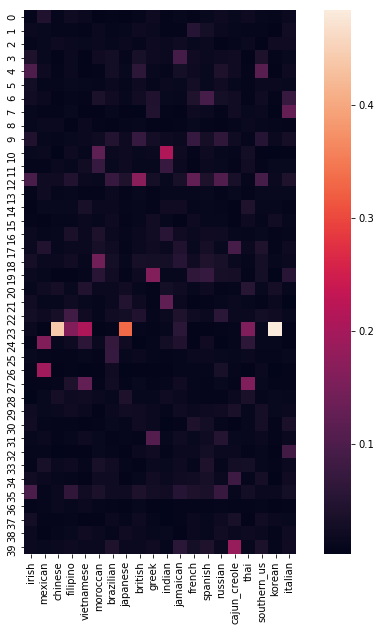

In [221]:
# Визуализируйте матрицу
matrix = compute_topic_cuisine_matrix(ldamodel2,corpus2,recipes)
plot_matrix(matrix)

Чем темнее квадрат в матрице, тем больше связь этой темы с данной кухней. Мы видим, что у нас есть темы, которые связаны с несколькими кухнями. Такие темы показывают набор ингредиентов, которые популярны в кухнях нескольких народов, то есть указывают на схожесть кухонь этих народов. Некоторые темы распределены по всем кухням равномерно, они показывают наборы продуктов, которые часто используются в кулинарии всех стран. 

Жаль, что в датасете нет названий рецептов, иначе темы было бы проще интерпретировать...

### Заключение
В этом задании вы построили несколько моделей LDA, посмотрели, на что влияют гиперпараметры модели и как можно использовать построенную модель. 